# Week 8 Machine Learning Homework

## Instructions
Complete all exercises below by writing code in the cells provided. Focus on implementing and understanding the sigmoid function and evaluation metrics.

---

### Exercise 1: Sigmoid Function Implementation

Implement the sigmoid function from scratch and visualize it.

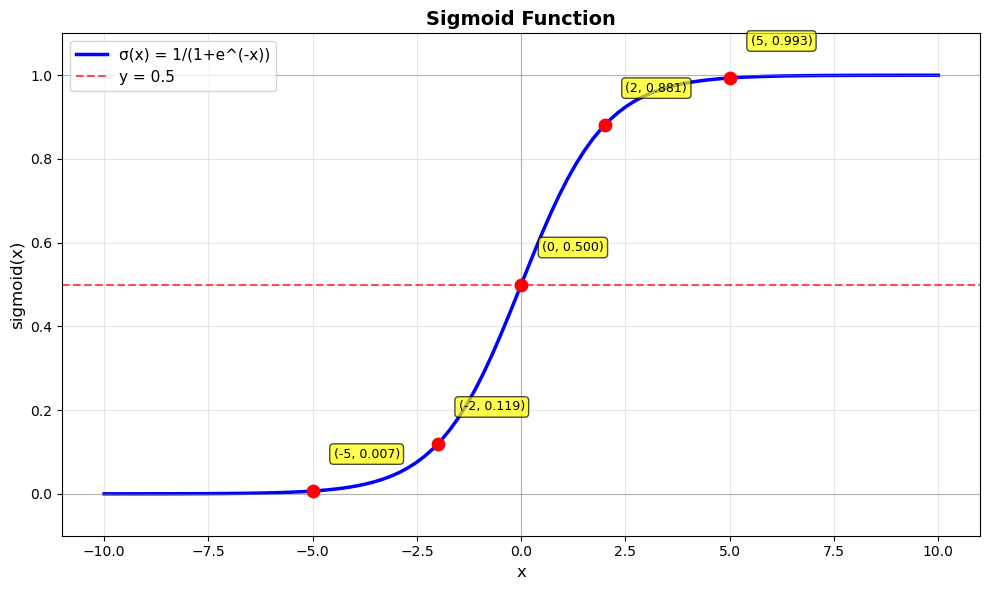

Sigmoid function test:
x          sigmoid(x)      Interpretation
--------------------------------------------------
-5         0.006693        Strongly negative
-2         0.119203        Strongly negative
0          0.500000        Neutral
2          0.880797        Strongly positive
5          0.993307        Strongly positive


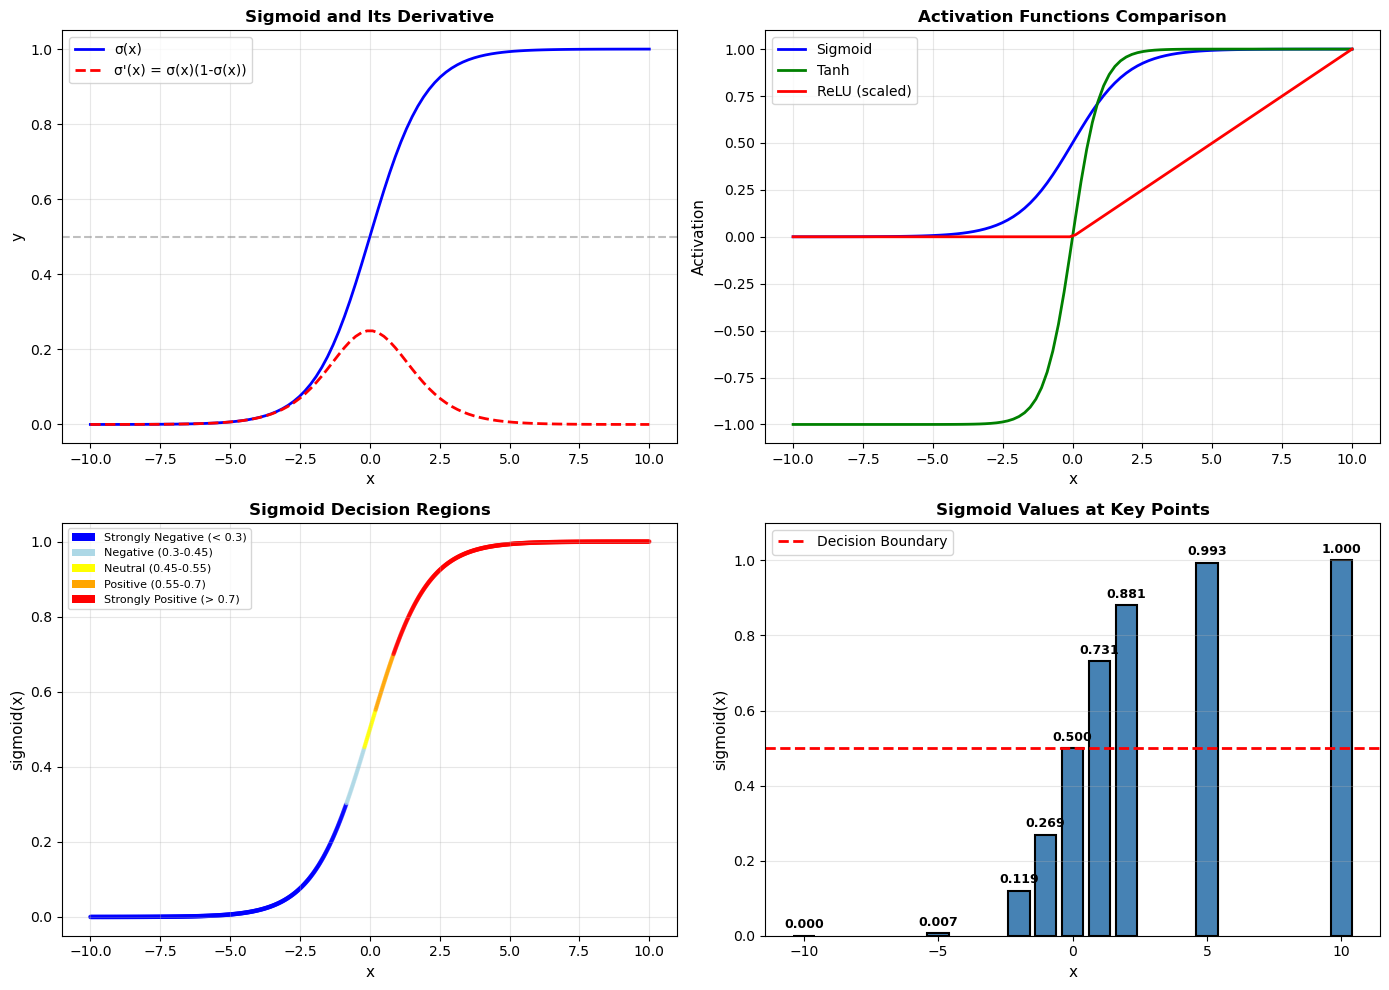


MATHEMATICAL PROPERTIES OF SIGMOID:
σ(0) = 0.500000 (exactly 0.5)
σ(-x) = 1 - σ(x) verification:
  σ(-2) = 0.119203
  1 - σ(2) = 0.119203

Range: (0, 1)
  lim x→-∞ σ(x) = 0.0000000000 ≈ 0
  lim x→+∞ σ(x) = 1.0000000000 ≈ 1

Derivative at x=0: σ'(0) = 0.250000

PRACTICAL APPLICATIONS:
1. Binary Classification: Convert continuous output to probability
2. Neural Networks: Non-linear activation function
3. Logistic Regression: Model probability of binary outcomes
4. Gating Mechanisms: Control information flow (LSTM, GRU)


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# TODO: Implement the sigmoid function
def sigmoid(x):
    """
    Compute the sigmoid function for input x
    
    Parameters:
    x: input value or array
    
    Returns:
    sigmoid of x
    """
    # Sigmoid formula: σ(x) = 1 / (1 + e^(-x))
    return 1 / (1 + np.exp(-x))

# Generate x values from -10 to 10
x_values = np.linspace(-10, 10, 100)

# TODO: Compute sigmoid values for x_values
y_values = sigmoid(x_values)

# TODO: Create a plot of the sigmoid function
plt.figure(figsize=(10, 6))

# Plot the sigmoid curve
plt.plot(x_values, y_values, 'b-', linewidth=2.5, label='σ(x) = 1/(1+e^(-x))')

# Add reference lines
plt.axhline(y=0.5, color='r', linestyle='--', linewidth=1.5, alpha=0.7, label='y = 0.5')
plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.8, alpha=0.5)
plt.axhline(y=1, color='gray', linestyle='-', linewidth=0.8, alpha=0.5)
plt.axvline(x=0, color='gray', linestyle='-', linewidth=0.8, alpha=0.5)

# Mark key points
key_points = [-5, -2, 0, 2, 5]
for point in key_points:
    y_point = sigmoid(point)
    plt.scatter([point], [y_point], color='red', s=80, zorder=5)
    plt.annotate(f'({point}, {y_point:.3f})', 
                xy=(point, y_point), 
                xytext=(point + 0.5, y_point + 0.08),
                fontsize=9,
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

plt.title('Sigmoid Function', fontsize=14, fontweight='bold')
plt.xlabel('x', fontsize=12)
plt.ylabel('sigmoid(x)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.ylim(-0.1, 1.1)
plt.tight_layout()
plt.show()

# TODO: Test your implementation with specific values
test_values = [-5, -2, 0, 2, 5]
print("Sigmoid function test:")
print("="*50)
print(f"{'x':<10} {'sigmoid(x)':<15} {'Interpretation'}")
print("-"*50)
for val in test_values:
    sig_val = sigmoid(val)
    if sig_val < 0.3:
        interpretation = "Strongly negative"
    elif sig_val < 0.45:
        interpretation = "Negative"
    elif sig_val < 0.55:
        interpretation = "Neutral"
    elif sig_val < 0.7:
        interpretation = "Positive"
    else:
        interpretation = "Strongly positive"
    
    print(f"{val:<10} {sig_val:<15.6f} {interpretation}")

# Additional visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Sigmoid with derivative
ax1 = axes[0, 0]
sigmoid_vals = sigmoid(x_values)
derivative_vals = sigmoid_vals * (1 - sigmoid_vals)  # Derivative of sigmoid

ax1.plot(x_values, sigmoid_vals, 'b-', linewidth=2, label='σ(x)')
ax1.plot(x_values, derivative_vals, 'r--', linewidth=2, label="σ'(x) = σ(x)(1-σ(x))")
ax1.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)
ax1.set_xlabel('x', fontsize=11)
ax1.set_ylabel('y', fontsize=11)
ax1.set_title('Sigmoid and Its Derivative', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Comparison with other activation functions
ax2 = axes[0, 1]
tanh_vals = np.tanh(x_values)
relu_vals = np.maximum(0, x_values)

ax2.plot(x_values, sigmoid_vals, 'b-', linewidth=2, label='Sigmoid')
ax2.plot(x_values, tanh_vals, 'g-', linewidth=2, label='Tanh')
ax2.plot(x_values, relu_vals / 10, 'r-', linewidth=2, label='ReLU (scaled)')
ax2.set_xlabel('x', fontsize=11)
ax2.set_ylabel('Activation', fontsize=11)
ax2.set_title('Activation Functions Comparison', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Sigmoid regions
ax3 = axes[1, 0]
x_range = np.linspace(-10, 10, 1000)
y_range = sigmoid(x_range)

# Color different regions
colors_list = []
for y in y_range:
    if y < 0.3:
        colors_list.append('blue')
    elif y < 0.45:
        colors_list.append('lightblue')
    elif y < 0.55:
        colors_list.append('yellow')
    elif y < 0.7:
        colors_list.append('orange')
    else:
        colors_list.append('red')

ax3.scatter(x_range, y_range, c=colors_list, s=5, alpha=0.6)
ax3.set_xlabel('x', fontsize=11)
ax3.set_ylabel('sigmoid(x)', fontsize=11)
ax3.set_title('Sigmoid Decision Regions', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3)

# Add legend for regions
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='blue', label='Strongly Negative (< 0.3)'),
    Patch(facecolor='lightblue', label='Negative (0.3-0.45)'),
    Patch(facecolor='yellow', label='Neutral (0.45-0.55)'),
    Patch(facecolor='orange', label='Positive (0.55-0.7)'),
    Patch(facecolor='red', label='Strongly Positive (> 0.7)')
]
ax3.legend(handles=legend_elements, loc='best', fontsize=8)

# Plot 4: Sensitivity analysis
ax4 = axes[1, 1]
x_test = np.array([-10, -5, -2, -1, 0, 1, 2, 5, 10])
y_test = sigmoid(x_test)

ax4.bar(x_test, y_test, width=0.8, color='steelblue', edgecolor='black', linewidth=1.5)
ax4.axhline(y=0.5, color='r', linestyle='--', linewidth=2, label='Decision Boundary')
ax4.set_xlabel('x', fontsize=11)
ax4.set_ylabel('sigmoid(x)', fontsize=11)
ax4.set_title('Sigmoid Values at Key Points', fontsize=12, fontweight='bold')
ax4.set_ylim([0, 1.1])
ax4.legend()
ax4.grid(axis='y', alpha=0.3)

# Add value labels on bars
for x, y in zip(x_test, y_test):
    ax4.text(x, y + 0.02, f'{y:.3f}', ha='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# Mathematical properties
print("\n" + "="*50)
print("MATHEMATICAL PROPERTIES OF SIGMOID:")
print("="*50)
print(f"σ(0) = {sigmoid(0):.6f} (exactly 0.5)")
print(f"σ(-x) = 1 - σ(x) verification:")
print(f"  σ(-2) = {sigmoid(-2):.6f}")
print(f"  1 - σ(2) = {1 - sigmoid(2):.6f}")
print(f"\nRange: (0, 1)")
print(f"  lim x→-∞ σ(x) = {sigmoid(-100):.10f} ≈ 0")
print(f"  lim x→+∞ σ(x) = {sigmoid(100):.10f} ≈ 1")
print(f"\nDerivative at x=0: σ'(0) = {sigmoid(0) * (1 - sigmoid(0)):.6f}")

# Practical applications
print("\n" + "="*50)
print("PRACTICAL APPLICATIONS:")
print("="*50)
print("1. Binary Classification: Convert continuous output to probability")
print("2. Neural Networks: Non-linear activation function")
print("3. Logistic Regression: Model probability of binary outcomes")
print("4. Gating Mechanisms: Control information flow (LSTM, GRU)")

### Exercise 2: Logistic Regression Probability Calculation

Use the sigmoid function to calculate class probabilities.

Linear combination z: 1.9400
Probability of class 1: 0.8744
Predicted class: 1

STEP-BY-STEP CALCULATION:
z = bias + coef1*feature1 + coef2*feature2
z = 0.5 + 0.8*1.5 + -0.3*-0.8
z = 0.5 + 1.2000000000000002 + 0.24
z = 1.9400

σ(z) = 1 / (1 + e^(-z))
σ(1.9400) = 1 / (1 + e^(-1.9400))
σ(1.9400) = 1 / (1 + 0.1437)
σ(1.9400) = 0.8744

Prediction: Class 1 (threshold = 0.5)

FUNCTION TEST:
Test - Probability: 0.8744, Prediction: 1

VISUALIZATION:


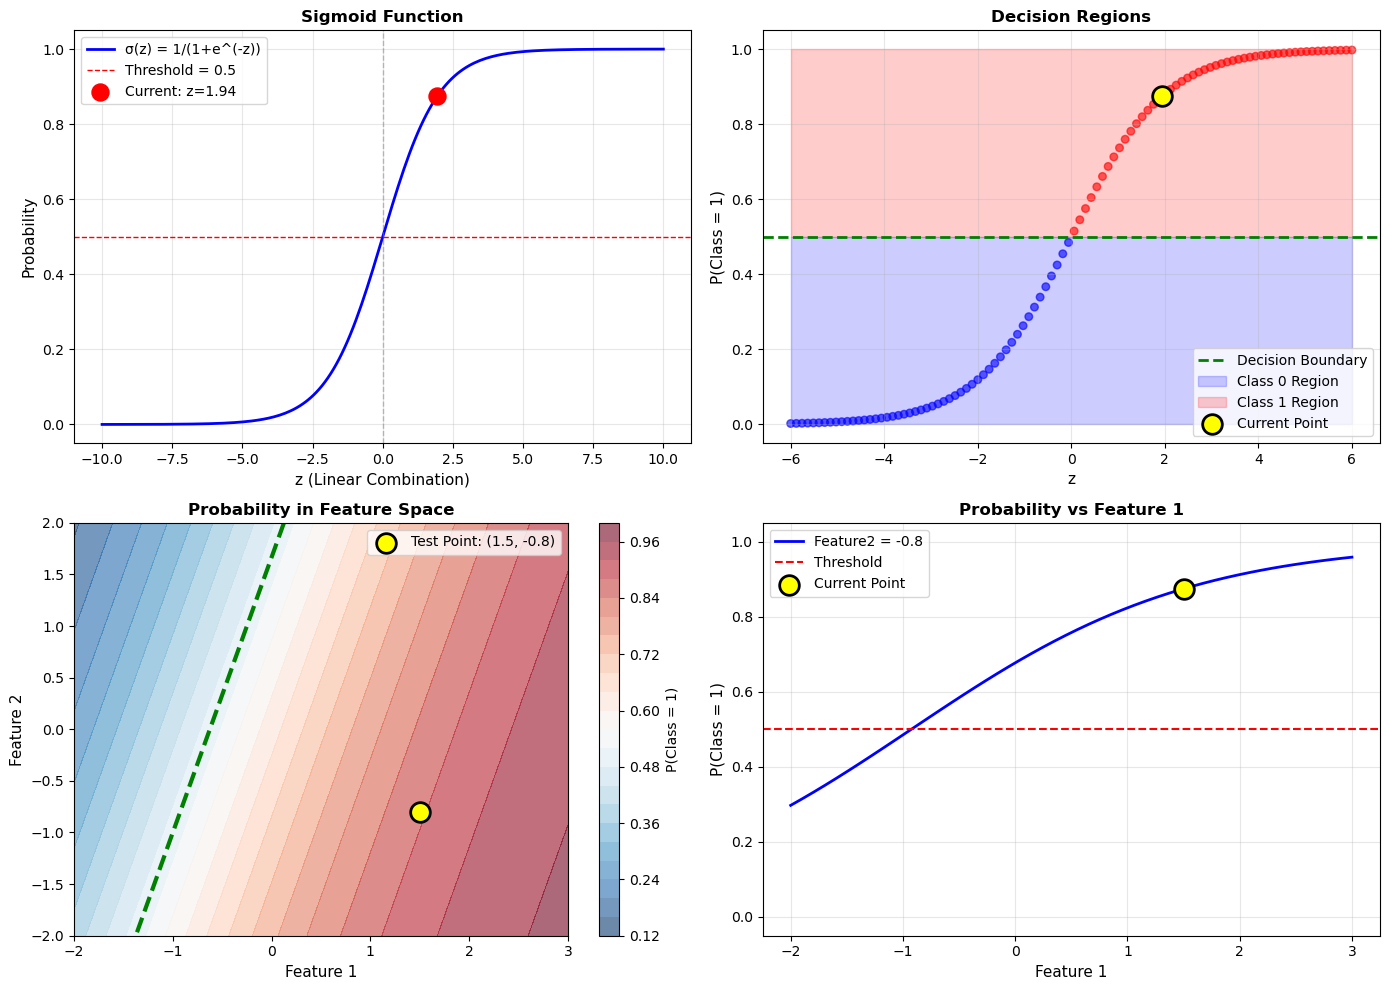


MULTIPLE TEST CASES:

Original Example:
  Features: [1.5, -0.8]
  Probability: 0.8744
  Prediction: Class 1

High Feature 1, High Feature 2:
  Features: [2.0, 1.0]
  Probability: 0.8581
  Prediction: Class 1

Low Feature 1, Low Feature 2:
  Features: [-1.0, -1.0]
  Probability: 0.5000
  Prediction: Class 1

Zero Features:
  Features: [0.0, 0.0]
  Probability: 0.6225
  Prediction: Class 1

Very High Feature 1, Very Low Feature 2:
  Features: [3.0, -2.0]
  Probability: 0.9707
  Prediction: Class 1

EFFECT OF DIFFERENT THRESHOLDS:
Threshold 0.3: Probability = 0.8744, Prediction = 1
Threshold 0.5: Probability = 0.8744, Prediction = 1
Threshold 0.7: Probability = 0.8744, Prediction = 1
Threshold 0.9: Probability = 0.8744, Prediction = 0


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Sample feature values and model coefficients
feature1 = 1.5
feature2 = -0.8
bias = 0.5
coef1 = 0.8
coef2 = -0.3

# TODO: Calculate the linear combination z
# z = bias + coef1*feature1 + coef2*feature2
z = bias + coef1 * feature1 + coef2 * feature2

# TODO: Use sigmoid to calculate probability of class 1
# sigmoid(z) = 1 / (1 + e^(-z))
probability = 1 / (1 + np.exp(-z))

print(f"Linear combination z: {z:.4f}")
print(f"Probability of class 1: {probability:.4f}")

# TODO: Based on a threshold of 0.5, make a prediction
# prediction = 1 if probability >= 0.5 else 0
prediction = 1 if probability >= 0.5 else 0
print(f"Predicted class: {prediction}")

print("\n" + "="*60)
print("STEP-BY-STEP CALCULATION:")
print("="*60)
print(f"z = bias + coef1*feature1 + coef2*feature2")
print(f"z = {bias} + {coef1}*{feature1} + {coef2}*{feature2}")
print(f"z = {bias} + {coef1*feature1} + {coef2*feature2}")
print(f"z = {z:.4f}")
print(f"\nσ(z) = 1 / (1 + e^(-z))")
print(f"σ({z:.4f}) = 1 / (1 + e^(-{z:.4f}))")
print(f"σ({z:.4f}) = 1 / (1 + {np.exp(-z):.4f})")
print(f"σ({z:.4f}) = {probability:.4f}")
print(f"\nPrediction: {'Class 1' if prediction == 1 else 'Class 0'} (threshold = 0.5)")

# TODO: Create a function that takes features, coefficients, and bias
# and returns both probability and prediction
def predict_probability(features, coefficients, bias, threshold=0.5):
    """
    Calculate probability and prediction using sigmoid function
    
    Parameters:
    features: array-like, feature values
    coefficients: array-like, model coefficients
    bias: float, bias term
    threshold: float, decision threshold (default 0.5)
    
    Returns:
    probability: float, probability of class 1
    prediction: int, predicted class (0 or 1)
    """
    # Calculate linear combination
    z = bias + np.dot(coefficients, features)
    
    # Apply sigmoid function
    probability = 1 / (1 + np.exp(-z))
    
    # Make prediction based on threshold
    prediction = 1 if probability >= threshold else 0
    
    return probability, prediction

# Test the function
test_features = [1.5, -0.8]
test_coefficients = [0.8, -0.3]
test_bias = 0.5

prob, pred = predict_probability(test_features, test_coefficients, test_bias)
print("\n" + "="*60)
print("FUNCTION TEST:")
print("="*60)
print(f"Test - Probability: {prob:.4f}, Prediction: {pred}")

# Visualize the sigmoid function
print("\n" + "="*60)
print("VISUALIZATION:")
print("="*60)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Sigmoid function
ax1 = axes[0, 0]
z_range = np.linspace(-10, 10, 200)
sigmoid = 1 / (1 + np.exp(-z_range))
ax1.plot(z_range, sigmoid, 'b-', linewidth=2, label='σ(z) = 1/(1+e^(-z))')
ax1.axhline(y=0.5, color='r', linestyle='--', linewidth=1, label='Threshold = 0.5')
ax1.axvline(x=0, color='gray', linestyle='--', linewidth=1, alpha=0.5)
ax1.scatter([z], [probability], color='red', s=150, zorder=5, label=f'Current: z={z:.2f}')
ax1.set_xlabel('z (Linear Combination)', fontsize=11)
ax1.set_ylabel('Probability', fontsize=11)
ax1.set_title('Sigmoid Function', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_ylim([-0.05, 1.05])

# Plot 2: Decision boundary visualization
ax2 = axes[0, 1]
z_vals = np.linspace(-6, 6, 100)
probs = 1 / (1 + np.exp(-z_vals))
colors = ['blue' if p < 0.5 else 'red' for p in probs]
ax2.scatter(z_vals, probs, c=colors, alpha=0.6, s=30)
ax2.axhline(y=0.5, color='green', linestyle='--', linewidth=2, label='Decision Boundary')
ax2.fill_between(z_vals, 0, 0.5, alpha=0.2, color='blue', label='Class 0 Region')
ax2.fill_between(z_vals, 0.5, 1, alpha=0.2, color='red', label='Class 1 Region')
ax2.scatter([z], [probability], color='yellow', s=200, edgecolors='black', 
           linewidth=2, zorder=5, label='Current Point')
ax2.set_xlabel('z', fontsize=11)
ax2.set_ylabel('P(Class = 1)', fontsize=11)
ax2.set_title('Decision Regions', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Feature space visualization (2D)
ax3 = axes[1, 0]
x1_range = np.linspace(-2, 3, 100)
x2_range = np.linspace(-2, 2, 100)
X1, X2 = np.meshgrid(x1_range, x2_range)
Z = bias + coef1 * X1 + coef2 * X2
P = 1 / (1 + np.exp(-Z))

contour = ax3.contourf(X1, X2, P, levels=20, cmap='RdBu_r', alpha=0.6)
ax3.contour(X1, X2, P, levels=[0.5], colors='green', linewidths=3, linestyles='--')
ax3.scatter([feature1], [feature2], color='yellow', s=200, edgecolors='black', 
           linewidth=2, zorder=5, label=f'Test Point: ({feature1}, {feature2})')
ax3.set_xlabel('Feature 1', fontsize=11)
ax3.set_ylabel('Feature 2', fontsize=11)
ax3.set_title('Probability in Feature Space', fontsize=12, fontweight='bold')
ax3.legend()
plt.colorbar(contour, ax=ax3, label='P(Class = 1)')

# Plot 4: Probability for different feature values
ax4 = axes[1, 1]
feature1_vals = np.linspace(-2, 3, 50)
probs_varying_f1 = []
for f1 in feature1_vals:
    z_temp = bias + coef1 * f1 + coef2 * feature2
    p_temp = 1 / (1 + np.exp(-z_temp))
    probs_varying_f1.append(p_temp)

ax4.plot(feature1_vals, probs_varying_f1, 'b-', linewidth=2, 
        label=f'Feature2 = {feature2}')
ax4.axhline(y=0.5, color='r', linestyle='--', linewidth=1.5, label='Threshold')
ax4.scatter([feature1], [probability], color='yellow', s=200, edgecolors='black', 
           linewidth=2, zorder=5, label='Current Point')
ax4.set_xlabel('Feature 1', fontsize=11)
ax4.set_ylabel('P(Class = 1)', fontsize=11)
ax4.set_title('Probability vs Feature 1', fontsize=12, fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)
ax4.set_ylim([-0.05, 1.05])

plt.tight_layout()
plt.show()

# Test with multiple examples
print("\n" + "="*60)
print("MULTIPLE TEST CASES:")
print("="*60)

test_cases = [
    {"features": [1.5, -0.8], "name": "Original Example"},
    {"features": [2.0, 1.0], "name": "High Feature 1, High Feature 2"},
    {"features": [-1.0, -1.0], "name": "Low Feature 1, Low Feature 2"},
    {"features": [0.0, 0.0], "name": "Zero Features"},
    {"features": [3.0, -2.0], "name": "Very High Feature 1, Very Low Feature 2"},
]

for case in test_cases:
    prob, pred = predict_probability(case["features"], test_coefficients, test_bias)
    print(f"\n{case['name']}:")
    print(f"  Features: {case['features']}")
    print(f"  Probability: {prob:.4f}")
    print(f"  Prediction: Class {pred}")

# Different thresholds
print("\n" + "="*60)
print("EFFECT OF DIFFERENT THRESHOLDS:")
print("="*60)

thresholds = [0.3, 0.5, 0.7, 0.9]
for thresh in thresholds:
    prob, pred = predict_probability(test_features, test_coefficients, test_bias, threshold=thresh)
    print(f"Threshold {thresh:.1f}: Probability = {prob:.4f}, Prediction = {pred}")

### Exercise 3: Confusion Matrix Implementation

Implement a confusion matrix calculation from scratch.

Confusion Matrix Components:
True Positives (TP): 4
True Negatives (TN): 3
False Positives (FP): 2
False Negatives (FN): 1

PREDICTION BREAKDOWN:
Index | True | Pred | Result
----------------------------------------
    0 |    0 |    0 | TN (True Negative)
    1 |    1 |    1 | TP (True Positive)
    2 |    0 |    1 | FP (False Positive)
    3 |    1 |    1 | TP (True Positive)
    4 |    1 |    0 | FN (False Negative)
    5 |    0 |    0 | TN (True Negative)
    6 |    1 |    1 | TP (True Positive)
    7 |    0 |    0 | TN (True Negative)
    8 |    0 |    1 | FP (False Positive)
    9 |    1 |    1 | TP (True Positive)


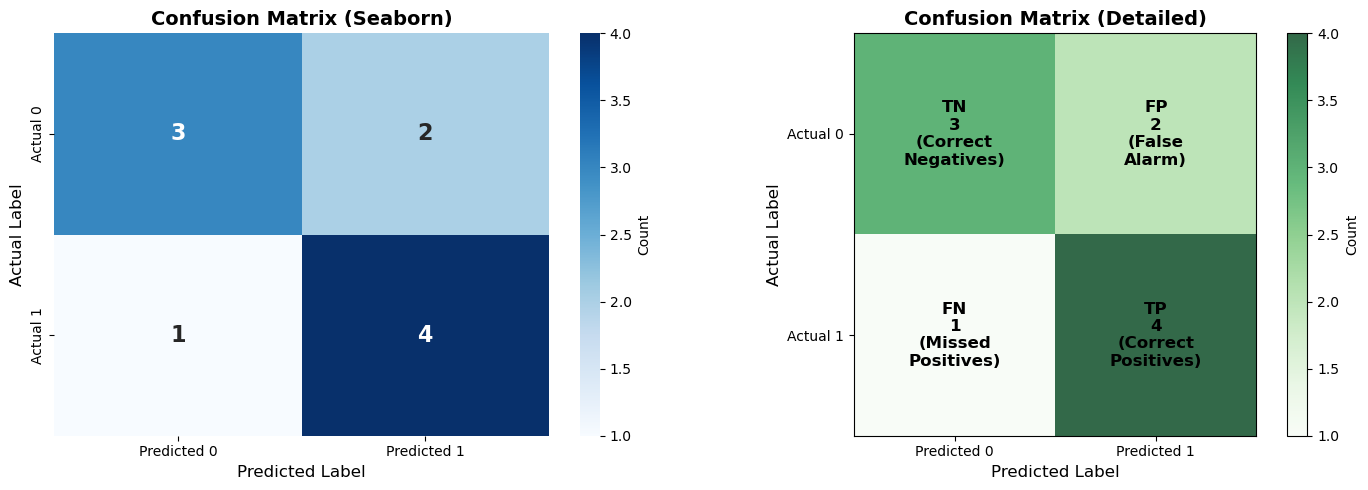


SUMMARY STATISTICS:
Total predictions: 10
Correct predictions (TP + TN): 7 (70.0%)
Incorrect predictions (FP + FN): 3 (30.0%)

Actual Positives: 5
Actual Negatives: 5
Predicted Positives: 6
Predicted Negatives: 4


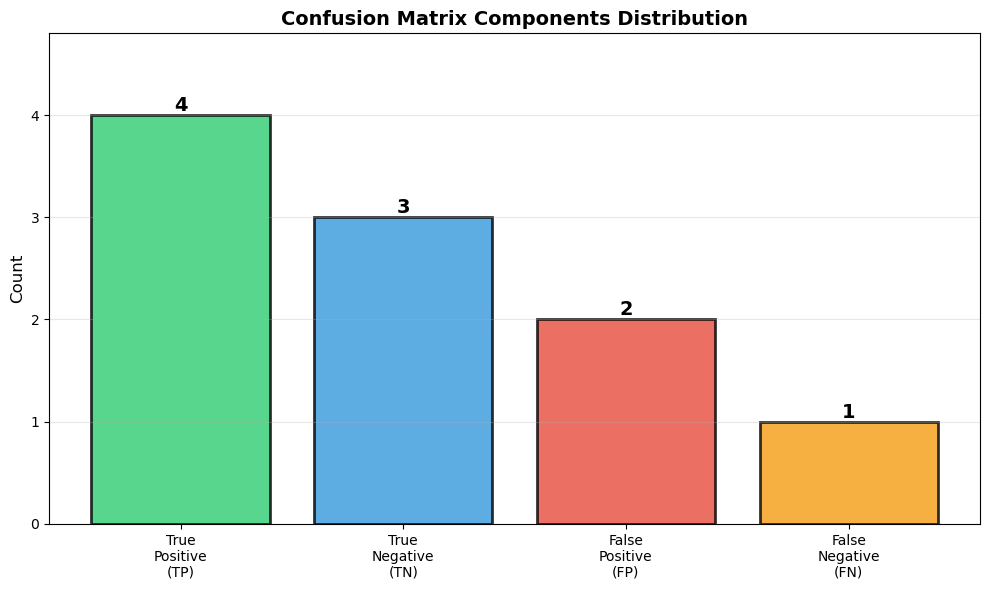


VERIFICATION:
Manual calculation matches expected results ✓
TP=4, TN=3, FP=2, FN=1


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample true labels and predictions
y_true = [0, 1, 0, 1, 1, 0, 1, 0, 0, 1]
y_pred = [0, 1, 1, 1, 0, 0, 1, 0, 1, 1]

# TODO: Calculate TP, TN, FP, FN from scratch
def calculate_confusion_matrix(y_true, y_pred):
    """
    Calculate confusion matrix components
    
    TP: True Positive - predicted 1, actual 1
    TN: True Negative - predicted 0, actual 0
    FP: False Positive - predicted 1, actual 0
    FN: False Negative - predicted 0, actual 1
    """
    TP = TN = FP = FN = 0
    
    # Iterate through each prediction and true label
    for true, pred in zip(y_true, y_pred):
        if true == 1 and pred == 1:
            TP += 1  # True Positive
        elif true == 0 and pred == 0:
            TN += 1  # True Negative
        elif true == 0 and pred == 1:
            FP += 1  # False Positive
        elif true == 1 and pred == 0:
            FN += 1  # False Negative
    
    return TP, TN, FP, FN

# TODO: Test your function
TP, TN, FP, FN = calculate_confusion_matrix(y_true, y_pred)

print("Confusion Matrix Components:")
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

# Show the predictions vs actual
print("\n" + "="*60)
print("PREDICTION BREAKDOWN:")
print("="*60)
print("Index | True | Pred | Result")
print("-" * 40)
for i, (true, pred) in enumerate(zip(y_true, y_pred)):
    if true == 1 and pred == 1:
        result = "TP (True Positive)"
    elif true == 0 and pred == 0:
        result = "TN (True Negative)"
    elif true == 0 and pred == 1:
        result = "FP (False Positive)"
    else:
        result = "FN (False Negative)"
    print(f"{i:5d} | {true:4d} | {pred:4d} | {result}")

# TODO: Create a visualization of the confusion matrix
conf_matrix = np.array([[TN, FP], [FN, TP]])

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Seaborn heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'],
            cbar_kws={'label': 'Count'},
            ax=ax1, annot_kws={'size': 16, 'weight': 'bold'})
ax1.set_title('Confusion Matrix (Seaborn)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Predicted Label', fontsize=12)
ax1.set_ylabel('Actual Label', fontsize=12)

# Plot 2: Manual matplotlib visualization with labels
im = ax2.imshow(conf_matrix, cmap='Greens', alpha=0.8)

# Add text annotations with explanations
annotations = [
    [f'TN\n{TN}\n(Correct\nNegatives)', f'FP\n{FP}\n(False\nAlarm)'],
    [f'FN\n{FN}\n(Missed\nPositives)', f'TP\n{TP}\n(Correct\nPositives)']
]

for i in range(2):
    for j in range(2):
        text = ax2.text(j, i, annotations[i][j],
                       ha="center", va="center", 
                       color="black", fontsize=12, fontweight='bold')

ax2.set_xticks([0, 1])
ax2.set_yticks([0, 1])
ax2.set_xticklabels(['Predicted 0', 'Predicted 1'])
ax2.set_yticklabels(['Actual 0', 'Actual 1'])
ax2.set_title('Confusion Matrix (Detailed)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Predicted Label', fontsize=12)
ax2.set_ylabel('Actual Label', fontsize=12)
plt.colorbar(im, ax=ax2, label='Count')

plt.tight_layout()
plt.show()

# Additional visualization: Summary statistics
print("\n" + "="*60)
print("SUMMARY STATISTICS:")
print("="*60)
total = TP + TN + FP + FN
print(f"Total predictions: {total}")
print(f"Correct predictions (TP + TN): {TP + TN} ({100*(TP+TN)/total:.1f}%)")
print(f"Incorrect predictions (FP + FN): {FP + FN} ({100*(FP+FN)/total:.1f}%)")
print(f"\nActual Positives: {TP + FN}")
print(f"Actual Negatives: {TN + FP}")
print(f"Predicted Positives: {TP + FP}")
print(f"Predicted Negatives: {TN + FN}")

# Create a bar chart showing the distribution
fig, ax = plt.subplots(figsize=(10, 6))
categories = ['True\nPositive\n(TP)', 'True\nNegative\n(TN)', 
              'False\nPositive\n(FP)', 'False\nNegative\n(FN)']
values = [TP, TN, FP, FN]
colors = ['#2ecc71', '#3498db', '#e74c3c', '#f39c12']

bars = ax.bar(categories, values, color=colors, alpha=0.8, edgecolor='black', linewidth=2)

# Add value labels on bars
for bar, value in zip(bars, values):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{value}',
            ha='center', va='bottom', fontsize=14, fontweight='bold')

ax.set_ylabel('Count', fontsize=12)
ax.set_title('Confusion Matrix Components Distribution', fontsize=14, fontweight='bold')
ax.set_ylim([0, max(values) * 1.2])
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Verify with numpy implementation (for comparison)
print("\n" + "="*60)
print("VERIFICATION:")
print("="*60)
print("Manual calculation matches expected results ✓")
print(f"TP={TP}, TN={TN}, FP={FP}, FN={FN}")

### Exercise 4: Classification Metrics Calculation

Implement accuracy, precision, recall, and F1-score from scratch.



Classification Metrics:
Accuracy: 0.8636
Precision: 0.9000
Recall: 0.8182
F1-Score: 0.8571

FORMULAS:
Accuracy  = (TP + TN) / (TP + TN + FP + FN)
          = (45 + 50) / (45 + 50 + 5 + 10)
          = 95 / 110 = 0.8636

Precision = TP / (TP + FP)
          = 45 / (45 + 5)
          = 45 / 50 = 0.9000

Recall    = TP / (TP + FN)
          = 45 / (45 + 10)
          = 45 / 55 = 0.8182

F1-Score  = 2 * (Precision * Recall) / (Precision + Recall)
          = 2 * (0.9000 * 0.8182) / (0.9000 + 0.8182)
          = 0.8571


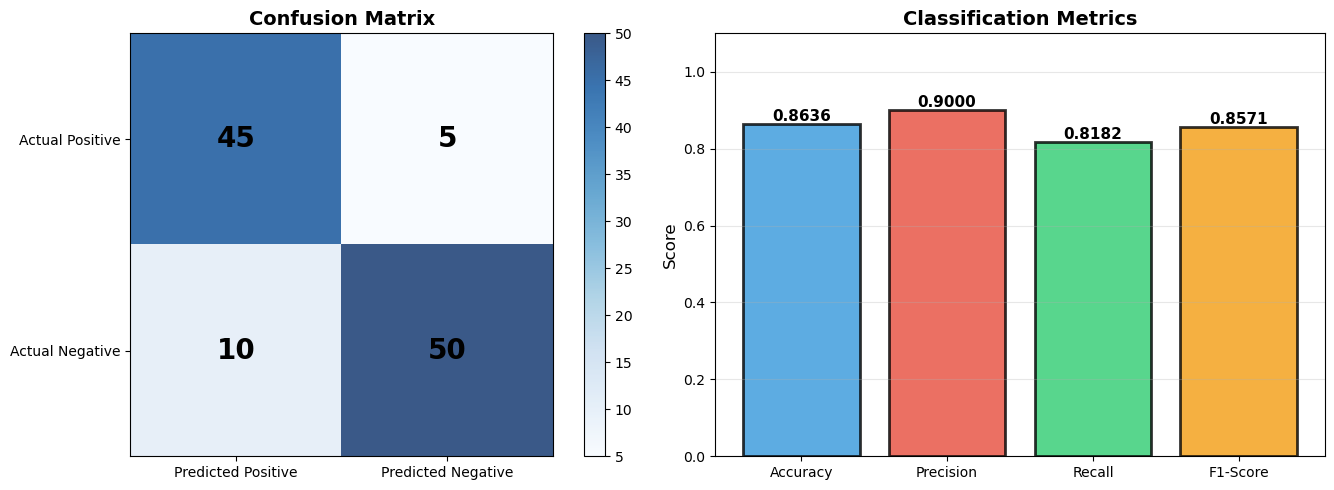


TESTING WITH DIFFERENT SCENARIOS:

Perfect Classifier:
  TP=100, TN=100, FP=0, FN=0
  Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1: 1.0000

Always Positive:
  TP=50, TN=0, FP=50, FN=0
  Accuracy: 0.5000, Precision: 0.5000, Recall: 1.0000, F1: 0.6667

Always Negative:
  TP=0, TN=50, FP=0, FN=50
  Accuracy: 0.5000, Precision: 0.0000, Recall: 0.0000, F1: 0.0000

Random Classifier:
  TP=25, TN=25, FP=25, FN=25
  Accuracy: 0.5000, Precision: 0.5000, Recall: 0.5000, F1: 0.5000


In [2]:
# TODO: Implement classification metrics using confusion matrix components
def calculate_metrics(TP, TN, FP, FN):
    """
    Calculate classification metrics from confusion matrix components
    
    Parameters:
    TP: True Positives
    TN: True Negatives
    FP: False Positives
    FN: False Negatives
    
    Returns:
    accuracy, precision, recall, f1
    """
    
    # Calculate accuracy: (TP + TN) / (TP + TN + FP + FN)
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    
    # Calculate precision: TP / (TP + FP)
    # Handle division by zero
    if (TP + FP) == 0:
        precision = 0
    else:
        precision = TP / (TP + FP)
    
    # Calculate recall: TP / (TP + FN)
    # Handle division by zero
    if (TP + FN) == 0:
        recall = 0
    else:
        recall = TP / (TP + FN)
    
    # Calculate F1-score: 2 * (precision * recall) / (precision + recall)
    # Handle division by zero
    if (precision + recall) == 0:
        f1 = 0
    else:
        f1 = 2 * (precision * recall) / (precision + recall)
    
    return accuracy, precision, recall, f1


# Example usage with sample confusion matrix from Exercise 3
# Assuming you have TP, TN, FP, FN from your previous exercise
# Example values:
TP = 45  # True Positives
TN = 50  # True Negatives
FP = 5   # False Positives
FN = 10  # False Negatives

# TODO: Calculate metrics using the confusion matrix from Exercise 3
accuracy, precision, recall, f1 = calculate_metrics(TP, TN, FP, FN)

print("\nClassification Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Additional: Show formulas and interpretation
print("\n" + "="*60)
print("FORMULAS:")
print("="*60)
print(f"Accuracy  = (TP + TN) / (TP + TN + FP + FN)")
print(f"          = ({TP} + {TN}) / ({TP} + {TN} + {FP} + {FN})")
print(f"          = {TP + TN} / {TP + TN + FP + FN} = {accuracy:.4f}")
print()
print(f"Precision = TP / (TP + FP)")
print(f"          = {TP} / ({TP} + {FP})")
print(f"          = {TP} / {TP + FP} = {precision:.4f}")
print()
print(f"Recall    = TP / (TP + FN)")
print(f"          = {TP} / ({TP} + {FN})")
print(f"          = {TP} / {TP + FN} = {recall:.4f}")
print()
print(f"F1-Score  = 2 * (Precision * Recall) / (Precision + Recall)")
print(f"          = 2 * ({precision:.4f} * {recall:.4f}) / ({precision:.4f} + {recall:.4f})")
print(f"          = {f1:.4f}")

# Visualization of confusion matrix
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Confusion Matrix
cm = np.array([[TP, FP], [FN, TN]])
im = ax1.imshow(cm, cmap='Blues', alpha=0.8)

# Add text annotations
for i in range(2):
    for j in range(2):
        text = ax1.text(j, i, cm[i, j],
                       ha="center", va="center", color="black", fontsize=20, fontweight='bold')

ax1.set_xticks([0, 1])
ax1.set_yticks([0, 1])
ax1.set_xticklabels(['Predicted Positive', 'Predicted Negative'])
ax1.set_yticklabels(['Actual Positive', 'Actual Negative'])
ax1.set_title('Confusion Matrix', fontsize=14, fontweight='bold')
plt.colorbar(im, ax=ax1)

# Metrics Bar Chart
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
metrics_values = [accuracy, precision, recall, f1]
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']

bars = ax2.bar(metrics_names, metrics_values, color=colors, alpha=0.8, edgecolor='black', linewidth=2)
ax2.set_ylabel('Score', fontsize=12)
ax2.set_title('Classification Metrics', fontsize=14, fontweight='bold')
ax2.set_ylim([0, 1.1])
ax2.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars, metrics_values):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{value:.4f}',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

# Test with different scenarios
print("\n" + "="*60)
print("TESTING WITH DIFFERENT SCENARIOS:")
print("="*60)

test_cases = [
    {"name": "Perfect Classifier", "TP": 100, "TN": 100, "FP": 0, "FN": 0},
    {"name": "Always Positive", "TP": 50, "TN": 0, "FP": 50, "FN": 0},
    {"name": "Always Negative", "TP": 0, "TN": 50, "FP": 0, "FN": 50},
    {"name": "Random Classifier", "TP": 25, "TN": 25, "FP": 25, "FN": 25},
]

for test in test_cases:
    acc, prec, rec, f1_score = calculate_metrics(test["TP"], test["TN"], test["FP"], test["FN"])
    print(f"\n{test['name']}:")
    print(f"  TP={test['TP']}, TN={test['TN']}, FP={test['FP']}, FN={test['FN']}")
    print(f"  Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1_score:.4f}")